<a href="https://colab.research.google.com/github/GalinaShevyreva/GB/blob/main/HA_WS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('/content/sample_data/kc_house_data.csv', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##1 задача  
Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы  
1.1. Скачать следующие данные: kc-house-data и laptop_price (не стала выгружать laptop_price, так как все задания относятся к первому датафрейму)  
1.2. Изучите стоимости недвижимости  


In [82]:
df['price'] = df['price'].astype(int)

In [83]:
df['price'].value_counts()

350000     172
450000     172
550000     159
500000     152
425000     150
          ... 
607010       1
1362500      1
298800       1
957500       1
402101       1
Name: price, Length: 4028, dtype: int64

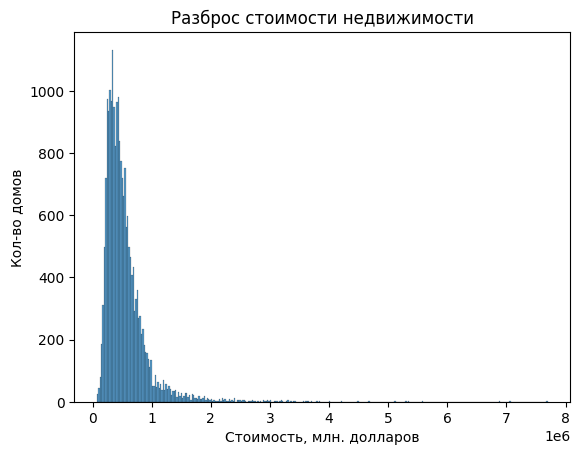

In [15]:
sns.histplot(df['price'])
plt.title('Разброс стоимости недвижимости')
plt.xlabel('Стоимость, млн. долларов')
plt.ylabel('Кол-во домов');

Для быстрого анализа диапазона стоимости домов я построила гистограмму. Из нее следует, что стоимость большинства домов находится в диапазоне от 300 тысяч до 700 тысяч долларов, при этом также на рынке присуствуют значительно более дорогие дома стоимостью почти в 8 млн долларов, но их существенно меньше.

In [16]:
df_filtered = df[df['price'] <= 1000000]

In [84]:
df_filtered['price'].value_counts()

450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
406550      1
278800      1
439888      1
354901      1
402101      1
Name: price, Length: 3431, dtype: int64

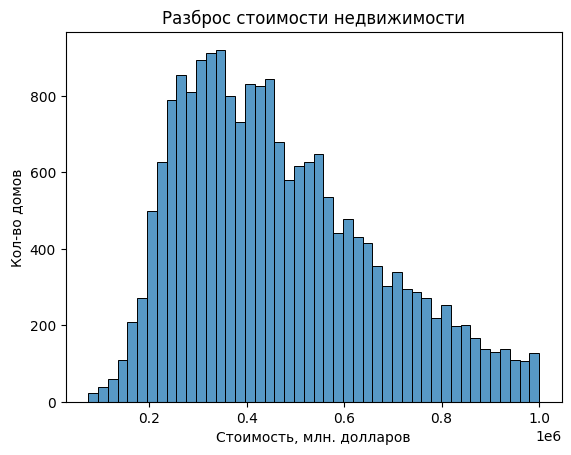

In [18]:
sns.histplot(df_filtered['price'])
plt.title('Разброс стоимости недвижимости')
plt.xlabel('Стоимость, млн. долларов')
plt.ylabel('Кол-во домов');

Для большей наглядности я отфитровала данные таким образом, чтобы в график попали только дома стоимостью до миллиона долларов. В этой выборке оказалось 3431 дома из 4028.

1.3. Изучите распределение квадратуры жилой  

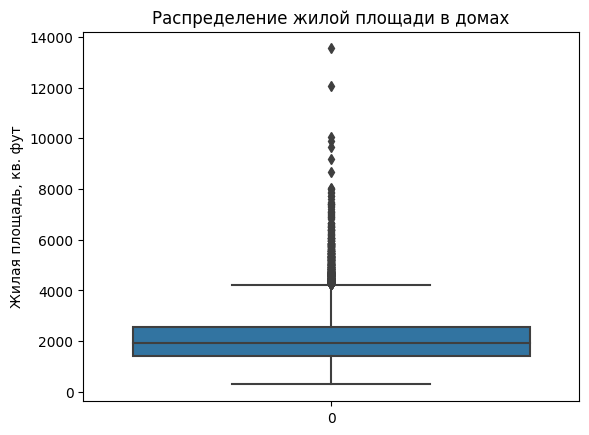

In [39]:
sns.boxplot(df['sqft_living'])
plt.title('Распределение жилой площади в домах')
plt.ylabel('Жилая площадь, кв. фут');

"Ящик с усами" позволяет нам понять, что в большиснстве домов жилая площадь варьируется от 1.5 до 3 тысяч кв. футов, поскольку межквартильный размах на графике не велик. Также видно, что в данных много выбросов.

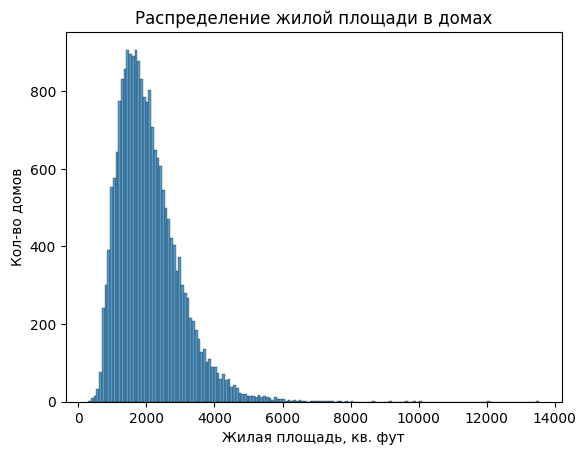

In [40]:
sns.histplot(df['sqft_living'])
plt.title('Распределение жилой площади в домах')
plt.xlabel('Жилая площадь, кв. фут')
plt.ylabel('Кол-во домов');

Гистограмма подтверждает мой вывод, в целом, такое распределение жилой площади можно назвать нормальным распределением: на рынке много домов со средним значением жилой площади, мало маленьких домов, очень больших домов несколько больше, но все же не так много.

1.4. Изучите распределение года постройки  

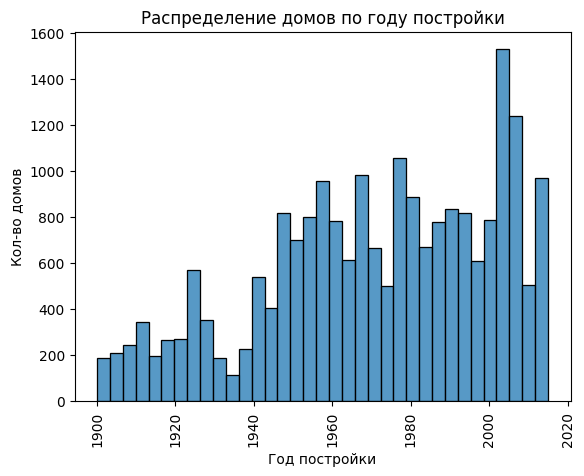

In [61]:
sns.histplot(df['yr_built'])
plt.title('Распределение домов по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов')
plt.xticks(rotation=90);

Из графика следует, что, в целом, строительство становилось все более и более масштабным, достигло пика в 2010-е, а затем пошло на спад. Также на графике наблюдается спад строительства в 30-х годах, что, вероятно, является следствием Великой Депрессии.

##2 задача
2.1. Изучите распределение домов от наличия вида на набережную  
Постройте график. Сделайте выводы

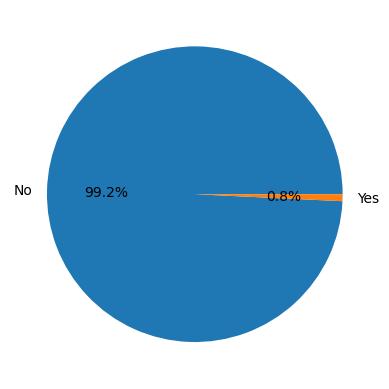

In [89]:
df_water = df['waterfront'].value_counts()
df_water = df_water.rename(index={0: 'No', 1: 'Yes'})
plt.pie(df_water, autopct='%.1f%%', labels=df_water.index);

На рынке представлено менее 1% домов с видом на море.

2.2. Изучите распределение этажей домов


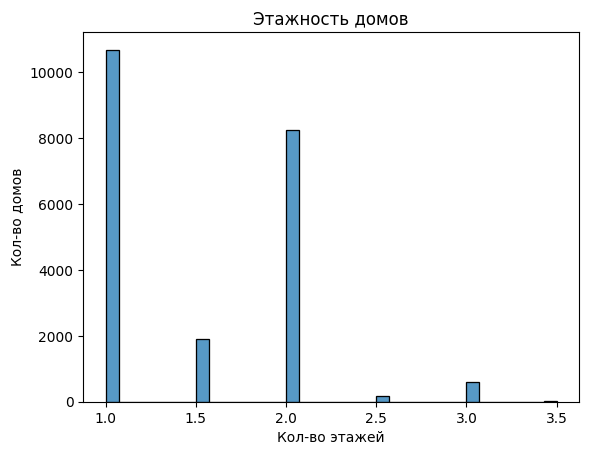

In [94]:
sns.histplot(df['floors'])
plt.title('Этажность домов')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов');

Большинство домов на рынке - одноэжтажные, также много и двухэтажных домов. Домов высотой более чем в два этажа встречается мало. При этом, видимо, также строят мансардные либо подвальные помещения, которые считаются как 0.5 этажа.

2.3. Изучите распределение состояния домов

In [98]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

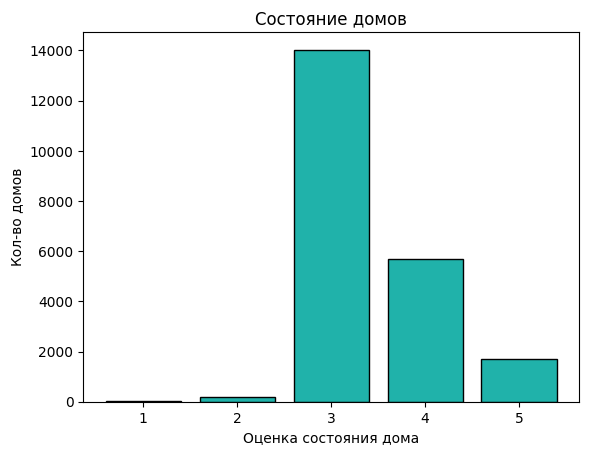

In [102]:
df_cond = df['condition'].value_counts()
plt.bar(df_cond.index, df_cond, linewidth=1.0, edgecolor='k', color='lightseagreen')
plt.title('Состояние домов')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Кол-во домов');

Большинство домов на рынке - среднего качества, при этом домов в плохом состоянии (оценка 1 и 2) крайне мало, а домов в хорошем и отличном состоянии (с оценкой 4 и 5) довольно много.

##3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

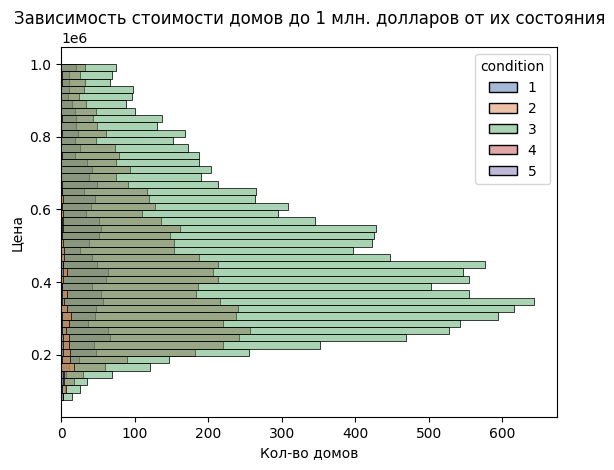

In [166]:
sns.histplot(data = df.drop(index=df[df['price'] > 1000000].index), y = 'price', hue = 'condition', palette = 'deep')
plt.title('Зависимость стоимости домов до 1 млн. долларов от их состояния')
plt.ylabel('Цена')
plt.xlabel('Кол-во домов');

Для удобства я разбила данные на две гистограммы: для домов стоимостью до 1 млн. долларов и для оставшихся домов. Как видно из графика, чем выше стоимость дома, тем меньше домов с оценкой состояния 3 и ниже.

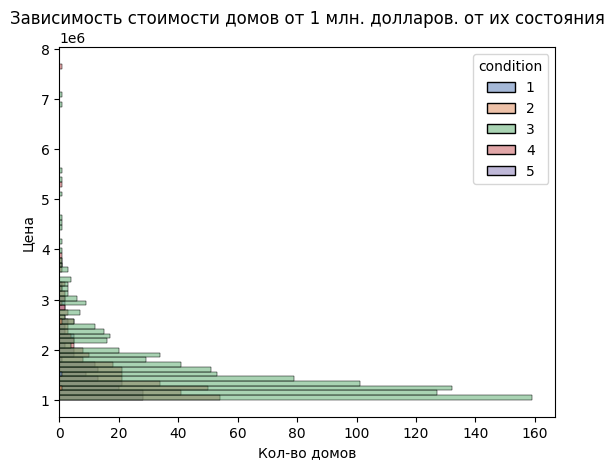

In [167]:
sns.histplot(data = df.drop(index=df[df['price'] <= 1000000].index), y = 'price', hue = 'condition', palette = 'deep')
plt.title('Зависимость стоимости домов от 1 млн. долларов. от их состояния')
plt.xlabel('Кол-во домов')
plt.ylabel('Цена');

Эта же тенденция наблюдается и в гистограмме для домов от 1 млн. долларов,  также мы видим, что с ростом цены количество домов сокращается, а оценка их состояния улучшается. Однако все же домов с оценкой 3 достаточно много, очевидно, этот фактор не является определяющим в формировании стоимости дома.

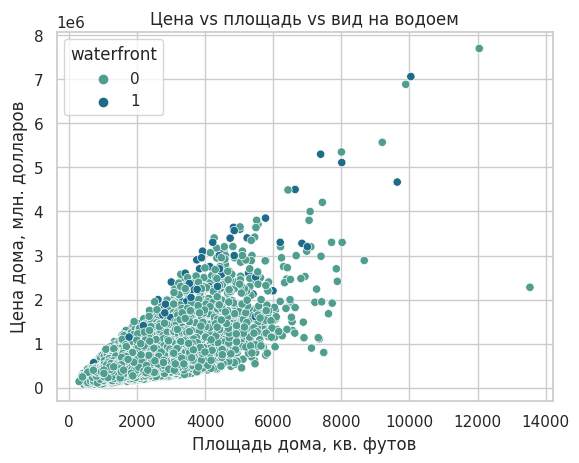

In [191]:
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', hue = 'waterfront', palette = 'crest')
plt.title('Цена vs площадь vs вид на водоем')
plt.xlabel('Площадь дома, кв. футов')
plt.ylabel('Цена дома, млн. долларов');

Данный график демонстрирует прямую зависимость: чем больше площадь дома, тем он дороже. Также можно отметить, что вид на водоем чаще встречается в более дорогих домах той же площади.

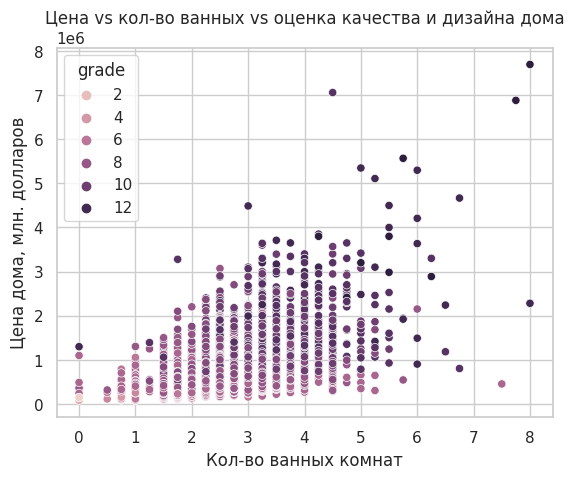

In [188]:
sns.set_theme(style="whitegrid")
sns.scatterplot(data = df, x = 'bathrooms', y = 'price', hue = 'grade')
plt.title('Цена vs кол-во ванных vs оценка качества и дизайна дома')
plt.xlabel('Кол-во ванных комнат')
plt.ylabel('Цена дома, млн. долларов');

Из графика следует, с количеством ванных комнат растет и стоимость недвижимости. При этом также более дорогие дома получили более высокую оценку по качеству строительства и дизайну здания.

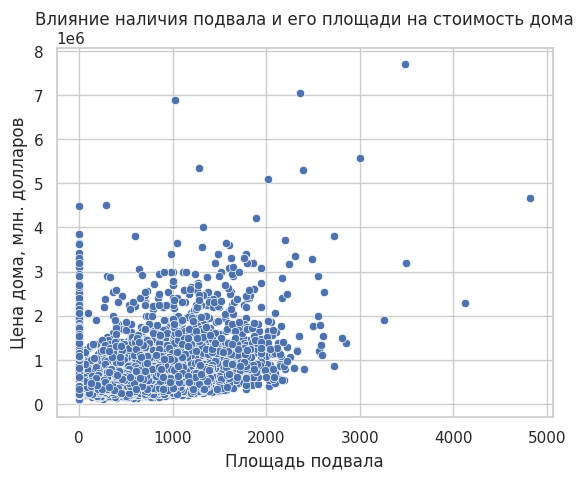

In [190]:
sns.scatterplot(data = df, x = 'sqft_basement', y = 'price')
plt.title('Влияние наличия подвала и его площади на стоимость дома')
plt.xlabel('Площадь подвала')
plt.ylabel('Цена дома, млн. долларов');

У самых дорогих домов есть подвал (подземная часть дома, которая также может быть жилой или ставаться в аренду), однако эти значения единичные. Среди домов, у которых подвала нет (его площадь равна 0), также много дорогих предложений. Очевидно, наличие подвального этажа не влияет на стоимость недвижимости.

In [175]:
df.loc[df['price'] <= 300000, 'price_group'] = 'Дешевые'
df.loc[(df['price'] > 300000) & (df['price'] <= 550000), 'price_group'] = 'Оптимальные'
df.loc[(df['price'] > 550000) & (df['price'] <= 1000000), 'price_group'] = 'Дорогие'
df.loc[df['price'] > 1000000, 'price_group'] = 'Очень дорогие'

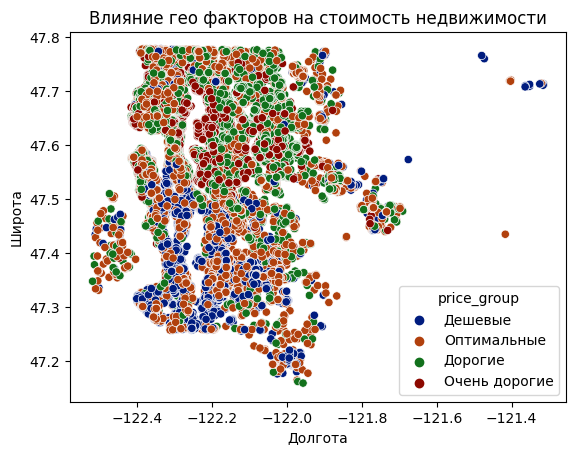

In [176]:
sns.scatterplot(data = df, x = 'long', y = 'lat', hue = 'price_group', palette = 'dark')
plt.title('Влияние гео факторов на стоимость недвижимости')
plt.xlabel('Долгота')
plt.ylabel('Широта');

Для удобства восприятия стоимость домов была разбита на 4 группы:   
* до 300 тыч. долларов,
* от 300 и до 550 тыч. долларов,
* от 550 тыч. до 1 млн. долларов
* и от 1 млн. долларов.  

Если сопоставить полученный график с картой округа Кинг, Вашингтон, то можно увидеть, что наиболее дешевая недвижимость находится на севере, в крупных городах (но не в столице штата), расположенных вдоль крупных автомобильных дорог. В то же время наиболее дорогая недвижимость расположена на юге, на берегу озера Вашингтон, озера Саммамиш и в центре Сиэтла. Видимо, именно расположение играет ключевую роль в ценообразовании.

Таким образом, на стоимость недвижимости оказывают основное влияние два фактора: во-первых, расположение дома, во-вторых, его площадь. С площадью также связаны такие параметры как количество спален, количество ванных комнат, площадь подвала.